### QUESTION 1

### QUESTION A:

- Write a program to calculate regression model that includes main effects and all two-factor interaction effects

In [343]:
import pandas as pd
import statsmodels.formula.api as smf

# Create a pandas dataframe from the data in Table 1
data = {'A': [-1, 1, -1, 1, -1, 1, -1, 1],
        'B': [-1, -1, 1, 1, -1, -1, 1, 1],
        'C': [-1, -1, -1, -1, 1, 1, 1, 1],
        'Replicate': ['1', '1', '1', '1', '2', '2', '2', '2'],
        'Orders1': [50, 44, 46, 42, 49, 48, 47, 56],
        'Orders2': [54, 42, 48, 43, 46, 45, 48, 54]}
df = pd.DataFrame(data)
df['New']=(df['Orders1']+df['Orders2'])/2

# Fit a regression model with main effects and two-factor interactions
model = smf.ols(formula='New ~ A + B + C + A:B + A:C + B:C', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    New   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     10.07
Date:                Sat, 15 Apr 2023   Prob (F-statistic):              0.237
Time:                        21:36:33   Log-Likelihood:                -5.8063
No. Observations:                   8   AIC:                             25.61
Df Residuals:                       1   BIC:                             26.17
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.6250      0.500     95.250      0.0

c:\Users\kanad\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### COMMENTS :

- The coefficients are [47.63, -0.875, 0.375, 1.5,1.625,2.5,1.75] for the regression model.

### QUESTION B:

- Perform the analyse of variance (Hint: complete table 2). Based on analysis which factors significantly affect the customer response rate?

In [344]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Read the data from the table and store it in a pandas dataframe
data = pd.DataFrame({
    'A': [-1, 1, -1, 1, -1, 1, -1, 1],
    'B': [-1, -1, 1, 1, -1, -1, 1, 1],
    'C': [-1, -1, -1, -1, 1, 1, 1, 1],  
})
df['Replicate_1']=[50, 44, 46, 42, 49, 48, 47, 56]
df['Replicate_2']=[54, 42, 48, 43, 46, 45, 48, 54]
df['Sum']=df['Replicate_1']+df['Replicate_2']
temp=df['Sum']
#print(temp)
def SS(x):
    return (8*x)**2/(8*2)
# Sum of Squares for A
A=(1/len(temp))*(temp[1]-temp[0]+temp[3]-temp[2]+temp[5]-temp[4]+temp[7]-temp[6])
SS_A=SS(A)
print('SS_A :',SS_A)
# Sum of Squares for B
B=(1/len(temp))*(temp[2]+temp[3]+temp[6]+temp[7]-temp[0]-temp[1]-temp[4]-temp[5])
SS_B=SS(B)
print('SS_B :',SS_B)
# Sum of Squares for C
C=(1/len(temp))*(temp[4]+temp[5]+temp[6]+temp[7]-temp[0]-temp[1]-temp[2]-temp[3])
SS_C=SS(C)
print('SS_C :',SS_C)
# Sum of Squares for AB
AB=(1/len(temp))*(temp[3]-temp[1]-temp[2]+temp[0]+temp[7]-temp[6]-temp[5]+temp[4])
SS_AB=SS(AB)
print('SS_AB :',SS_AB)
# Sum of Squares for AC
AC=(1/len(temp))*(temp[0]-temp[1]+temp[2]-temp[3]-temp[4]+temp[5]-temp[6]+temp[7])
SS_AC=SS(AC)
print('SS_AC :',SS_AC)
# Sum of Squares for BC
BC=(1/len(temp))*(temp[0]+temp[1]-temp[2]-temp[3]-temp[4]-temp[5]+temp[6]+temp[7])
SS_BC=SS(BC)
print('SS_BC :',SS_BC)
# Sum of Squares for Model
SSModel=SS_A+SS_B+SS_C+SS_AB+SS_BC+SS_AC
print('SS_Model :',SSModel)
# Sum of Squares for Total
S=df['Replicate_1'].to_numpy()**2+df['Replicate_2'].to_numpy()**2
S=np.sum(S)-(np.sum(df['Replicate_1'].to_numpy()+df['Replicate_2'].to_numpy()))**2/16
#print(S)
SST=S
print('SS_T :',SST)
SS_Residual=SST-SSModel
print('Residual error :',SS_Residual)
# Sum of Squares for ABC
ABC=(1/len(temp))*(temp[7]-temp[6]-temp[5]+temp[4]-temp[3]+temp[2]+temp[1]-temp[0])
SS_ABC=SS(ABC)
print('SS_ABC/ SS_Lack of Fit:',SS_ABC)
SS_Pure_Error = SS_Residual - SS_ABC
print('SS_Pure Error :',SS_Pure_Error)

SS_A : 12.25
SS_B : 2.25
SS_C : 36.0
SS_AB : 42.25
SS_AC : 100.0
SS_BC : 49.0
SS_Model : 241.75
SS_T : 269.75
Residual error : 28.0
SS_ABC/ SS_Lack of Fit: 4.0
SS_Pure Error : 24.0


In [345]:
DOF=[6,1,1,1,1,1,1,9,1,8,15] # Degree of freedom

In [346]:
MSE=[SSModel/DOF[0],SS_A/DOF[1],SS_B/DOF[2],SS_C/DOF[3],SS_AB/DOF[4],SS_BC/DOF[5],SS_AC/DOF[6],
     SS_Residual/DOF[7],SS_ABC/DOF[8],SS_Pure_Error/DOF[9],np.nan]

In [347]:
F=[]
for i in range(len(MSE)):
    F.append(MSE[i]/MSE[7])
print(F)

[12.950892857142856, 3.9375, 0.7232142857142857, 11.571428571428571, 13.580357142857142, 15.75, 32.14285714285714, 1.0, 1.2857142857142856, 0.9642857142857143, nan]


In [348]:
# create the ANOVA table
anova_table = pd.DataFrame({
    'Source of Variation': ['Model', 'A', 'B','C', 'AB','AC', 'BC','Residual', 'Lack of Fit','Pure error', 'Total'],
    'Sum of Squares': [SSModel,SS_A,SS_B,SS_C,SS_AB,SS_BC,SS_AC,SS_Residual,SS_ABC,SS_Pure_Error,SST],
    'Degrees of Freedom': DOF,
    'Mean Square': MSE,
    'F value': F,
})

# set the index to the source column
anova_table.set_index('Source of Variation', inplace=True)

# display the ANOVA table
print(anova_table)

                     Sum of Squares  Degrees of Freedom  Mean Square  \
Source of Variation                                                    
Model                        241.75                   6    40.291667   
A                             12.25                   1    12.250000   
B                              2.25                   1     2.250000   
C                             36.00                   1    36.000000   
AB                            42.25                   1    42.250000   
AC                            49.00                   1    49.000000   
BC                           100.00                   1   100.000000   
Residual                      28.00                   9     3.111111   
Lack of Fit                    4.00                   1     4.000000   
Pure error                    24.00                   8     3.000000   
Total                        269.75                  15          NaN   

                       F value  
Source of Variation           

### COMMENTS :

- The Model F-value of 12.95 implies the model is significant. There is only a 0.06% chance that a "Model F-Value" this large could occur due to noise.

- In this case C, AB, AC, BC are significant model terms. 

- From the F values the two factor interactions, AB, AC, BC, and factors A and C as significant. Factor B is not significant; however, remains in the model to satisfy the hierarchal principle. The analysis of variance confirms the significance of two factor interactions and factor C.However, factor A is only marginally significant compared to others.

### QUESTION C:
- Analyze the residuals from this experiment. Are there any indications of model inadequacy? (There will be two graphs; the x-axis Vs y-axis will be, ‘Residual’ Vs ‘Normal % Probability’ in the first graph and ‘Predicted’ Vs ‘Residuals' in the second graph. The plot colour should be RED for both graphs.)

c:\Users\kanad\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


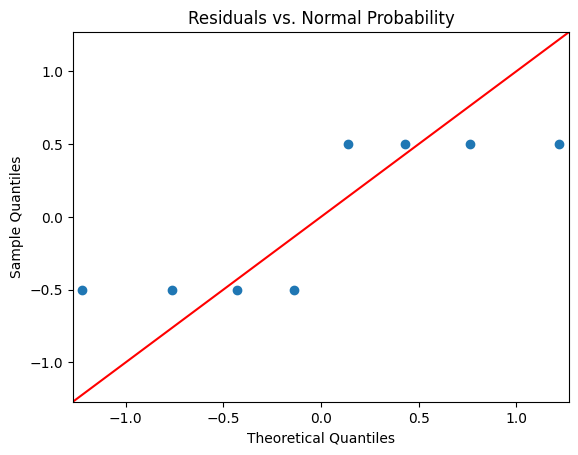

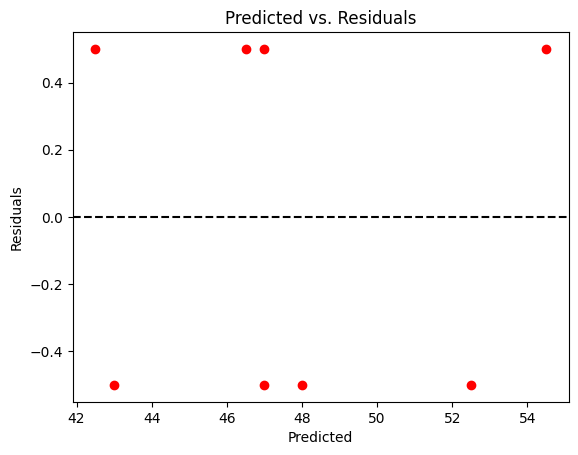

In [349]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate the residual vs. normal probability plot
residuals = model.resid
fig, ax = plt.subplots()
sm.qqplot(residuals, line='45', ax=ax, color='red')
ax.set(title='Residuals vs. Normal Probability', xlabel='Theoretical Quantiles', ylabel='Sample Quantiles')
plt.show()

# Generate the predicted vs. residuals plot
predicted = model.fittedvalues
fig, ax = plt.subplots()
ax.scatter(predicted, residuals, color='red')
ax.axhline(y=0, color='black', linestyle='--')
ax.set(title='Predicted vs. Residuals', xlabel='Predicted', ylabel='Residuals')
plt.show()



### COMMENTS :

- The residual plots below do not identify model inadequacy.

### QUESTION D:

- Suppose only one-half of data in given problem could be run, construct the design and perform the statistical analysis using the data from replicate I

In [350]:
X = [[-1, -1],
     [-1, 1],
     [1, -1],
     [1, 1]]
y=((df['Replicate_1'])).loc[0:3].to_numpy()
y

array([50, 44, 46, 42], dtype=int64)

In [351]:
# Calculate total sum of squares
total_ss = np.sum(y**2)-np.sum(y)**2/4
print(total_ss)

# Calculate sum of squares for factor A
ss_a = (y[3]+y[1]-y[2]-y[0])**2/(4)

# Calculate sum of squares for factor B
ss_b = (y[3]+y[2]-y[1]-y[0])**2/(4)

# Calculate sum of squares for interaction AB
ss_ab = (y[3]+y[0]-y[1]-y[2])**2/(4)

# Calculate residual sum of squares
error_ss = total_ss - ss_a - ss_b - ss_ab

# Calculate degrees of freedom
df_a = 1
df_b = 1
df_ab = 1
df_error = 8

# Calculate the mean square for each source of variation
ms_a = ss_a / df_a
ms_b = ss_b / df_b
ms_ab = ss_ab / df_ab
ms_error = error_ss / df_error

# Calculate the F-value for each source of variation
f_a = ms_a / ms_error
f_b = ms_b / ms_error
f_ab = ms_ab / ms_error

# Calculate the p-value for each source of variation
p_a = 1 - stats.f.cdf(f_a, df_a, df_error)
p_b = 1 - stats.f.cdf(f_b, df_b, df_error)
p_ab = 1 - stats.f.cdf(f_ab, df_ab, df_error)

# Display the results
df = pd.DataFrame({'Source of Variation':['A','B','AB','Error'],
                   'Sum of Squares':[ss_a,ss_b,ss_ab,error_ss],
                   'Degrees of Freedom':[df_a,df_b,df_ab,df_error],
                   'Mean Square':[ms_a,ms_b,ms_ab,ms_error],
                   'F-value':[f_a,f_b,f_ab,np.nan],
                   'p-value':[p_a,p_b,p_ab,np.nan]})
print(df)


35.0
  Source of Variation  Sum of Squares  Degrees of Freedom  Mean Square  \
0                   A            25.0                   1         25.0   
1                   B             9.0                   1          9.0   
2                  AB             1.0                   1          1.0   
3               Error             0.0                   8          0.0   

   F-value  p-value  
0      inf      0.0  
1      inf      0.0  
2      inf      0.0  
3      NaN      NaN  


C:\Users\kanad\AppData\Local\Temp\ipykernel_25884\2541813103.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  f_a = ms_a / ms_error
C:\Users\kanad\AppData\Local\Temp\ipykernel_25884\2541813103.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  f_b = ms_b / ms_error
C:\Users\kanad\AppData\Local\Temp\ipykernel_25884\2541813103.py:32: RuntimeWarning: divide by zero encountered in double_scalars
  f_ab = ms_ab / ms_error


### COMMENTS :

-  Here we can see that the error is 0.